# Magma Dynamics Practical 6: Simple Diffusion Modelling - Answers#
## John Maclennan, February 2021 ##


## Diffusion Chronometry

Diffusion chronometry is one of the fastest growing fields in petrology. It holds great potential for furthering our understanding of magmatic processes. The essence of the method is that the growth of individual crystals can take place across a range of $(P,T,X)$ producing crystal zones that are not in chemical equilibrium with each other or the host liquid at any single $(P,T,X)$. This disequilibrium, variation in the chemical potentials, provides a driver for diffusion. Diffusion ultimately acts to redistribute the elements to provide the minimum free energy arrangement of chemically homogenous phase. For a very quick introduction to some of the sorts of observations that can be useful in diffusion chronometry, you you take a look at the diagrams in [Costa et al., 2020](https://www.nature.com/articles/s43017-020-0038-x).

### Fick's First and Second Laws
Practically speaking, diffusion modelling involves direct fitting of concentration profiles that have been measured in igneous crystals. In some more advanced cases, such as Mg-in-plagioclase, it is necessary to fit chemical activities rather than concentrations. Fick's first law states that:

$J_i = -D_i \nabla C_i$

where $J_i$ is the flux of element $i$, $C_i$ is the concentration of that component and $D$ is called the diffusion coefficient. This is the general 3D form of the expression and clearly all sorts of richness of behaviour can be created in nature with 3D variations in concentration and anisotropic diffusion (like in olivine). We'll simplify to 1D in a moment (which means that the $\nabla$ from vector calculus will be replaced by partial differential operators).

Fick's second law gives the change in concentration of the element that arises from this flux (dropping the $i$s:

$\frac{\partial C}{\partial t} = \nabla . (D \nabla C)$

If we convert this into the 1D case with $x$ being distance we find:

$\frac{\partial C}{\partial t} = \frac{\partial}{\partial x} D \frac{\partial C}{\partial x}$

In general $D$ is a function of the changing crystal major element composition, such as the forsterite content of olivine or anorthite content of plagioclase. When the major element composition changes within a crystal, it means that $D$ will vary within that crystal, so the general above equation must be solved. In some simple systems it is acceptable to assume that $D$ is constant throughout the crystal, providing the familiar simple version of the diffusion equation:

$\frac{\partial C}{\partial t} = D \frac{\partial^{2} C}{\partial x^{2}}$

In order to solve this equation it is necessary to provide initial and boundary conditions.

### Application to Initially Uniform Crystal
One situation that is commonly assumed is that a crystal interior is initially homogeneous and has a composition $C_1$. The boundary conditions then changes, perhaps because of a change in the carrier liquid composition, such that the composition of crystal in equilibrium with the liquid is $C_2$. If the compositional rim is thin in comparison to the length of the face, the 1D solution may be appropriate. The solution to this type of problem is given by  

$C(x,t) = C_1 + \Delta C \left[1 - {\rm erf}\left( \frac{x}{\sqrt{4Dt}}\right) \right]$

with $C(x,t)$ being the concentration as a function of position, $x$ and time, $t$. The difference in composition between the crystal rim (in equilibrium with the external liquid) and the crystal core is given as $\Delta C = C_2 - C_1$ and the [error function](https://en.wikipedia.org/wiki/Error_function#:~:text=In%20mathematics%2C%20the%20error%20function,statistics%2C%20and%20partial%20differential%20equations.) is defined as,

${\rm erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z \exp{(-\psi^2)} d\psi$.

You might be able to see that expression is related the area under a normal distribution curve. The error function appears as part of the solution in many diffusion problems. A classic textbook for providing handy analytical solutions to an impressive array of diffusion problems is the Conduction of Heat in Solids by Carslaw and Jaeger.  

This particular problem can be modelled in python using the chunk of code in the next cell. Please change the labels and experiment with changing the time and the distance range and the rim (set at $x=0$ in this case) and initial core compositions. A useful skill is to be able to plot extra lines on the figure. There was an example of this provided in the previous practical. You could show the compositional profiles at varying times, and/or show the characteristic diffusion distance for a given time. 

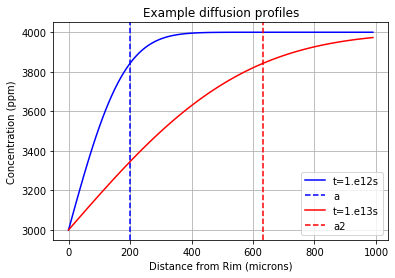

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # numpy, which is great for scientific computing and dealing with arrays, doesn't have erf built in
from scipy.special import erf # the scipy package does, however


D = 1.e-20 # diffusion coefficient in m2/s
t = 1.e12 # time in seconds
C1 = 4000. # ppm original concentration of element in crystal
C2 = 3000. # ppm final concentration in equilibrium with host melt
delC = C2-C1
a = (4.*D*t)**0.5 # characteristic lengthscale in m

xx = np.arange(0.000000001,0.001, 0.00001)

#xx = 0.00001


CC = (C1 + delC*(1. - erf(np.divide(xx,a))))

fig, ax = plt.subplots()
ax.plot(xx*1.E6, CC, color = "b", label = "t=1.e12s") # convert metres to micron scale, add in a label for legend
ax.axvline(a*1.E6, ls = "--", color = "b", label = "a") # blue dashed vertical line at characteristic distance (for time 1)

# show a different time
t2 = 1.e13 # a different time in seconds
a2 = (4.*D*t2)**0.5 # characteristic lengthscale in m
CC2 = (C1 + delC*(1. - erf(np.divide(xx,a2))))

ax.plot(xx*1.E6, CC2, color = "r", label = "t=1.e13s") # convert metres to micron scale 
ax.axvline(a2*1.E6, ls = "--", color = "r", label = "a2")

ax.set(xlabel='Distance from Rim (microns)', ylabel='Concentration (ppm)',
       title='Example diffusion profiles')
ax.legend()
ax.grid()

#fig.savefig("test.png")
plt.show()


Have a look at Figure 3 in [Hartley et al. (2016)](https://www.sciencedirect.com/science/article/pii/S0012821X16000340#fg0030). The variation in the greyscale intensity in backscattered electron (BSE) images of olivines from Laki are controlled by variations in the mean atomic mass. In a simple solid solution between fosterite and fayalite, this provides a map of Fo content: with a linear scaling between BSE grayscale intensity value and olivine composition. Try to model the interdiffusion of Fe-Mg using an effective diffusion coefficient of $D=10^{-16}$ m$^2$ s$^{-1}$ by varying the parameters in the code chunk above. 

**Q1) What are your estimates of the timescale of diffusion required to form these rims? How do your results compare with those of Hartley et al?**

A1) It looks like characteristic diffusion length of the profiles from the Hartley paper are about 20 microns. We match that at about $10^{6}$ s, which is about 11 days - fairly similar to the Hartley numbers. 

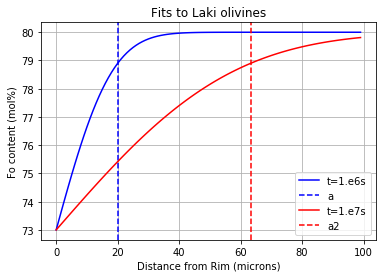

In [13]:
# new code chunk specifically for Hartley problem - set D as required, set x range from observations

D = 1.e-16 # diffusion coefficient in m2/s
t = 1.e6 # time in seconds
C1 = 80. # Forsterite content of crystal core - initial
C2 = 73. # Fo content of olivine in equilibrium with host melt
delC = C2-C1
a = (4.*D*t)**0.5 # characteristic lengthscale in m

xx = np.arange(0.000000001,0.0001, 0.000001)

#xx = 0.00001


CC = (C1 + delC*(1. - erf(np.divide(xx,a))))

fig, ax = plt.subplots()
ax.plot(xx*1.E6, CC, color = "b", label = "t=1.e6s") # convert metres to micron scale, add in a label for legend
ax.axvline(a*1.E6, ls = "--", color = "b", label = "a") # blue dashed vertical line at characteristic distance (for time 1)

# show a different time
t2 = 1.e7 # a different time in seconds
a2 = (4.*D*t2)**0.5 # characteristic lengthscale in m
CC2 = (C1 + delC*(1. - erf(np.divide(xx,a2))))

ax.plot(xx*1.E6, CC2, color = "r", label = "t=1.e7s") # convert metres to micron scale 
ax.axvline(a2*1.E6, ls = "--", color = "r", label = "a2")

ax.set(xlabel='Distance from Rim (microns)', ylabel='Fo content (mol%)',
       title='Fits to Laki olivines')
ax.legend()
ax.grid()

#fig.savefig("test.png")
plt.show()


In [14]:
1.e06/(60.*60.*24.)

11.574074074074074

**Q2) Speculate on some causes of uncertainty in this timescale estimate.**

A2) There are many causes of uncertainty. Temperature is important. Assumptions about initial conditions of nature of boundary conditions. We ignored any compositional control on $D$. Anistropy of diffusion is also known to be crucial in olivines. We ignored the role of crystal growth.  

**Q3) How effective is the use of the characteristic diffusion lengthscale $Dt$ as a timescale estimate?**

A3) It is useful as a means of quickly establishing the rough timescale (days versus years versus millenia, for example). 

**Q4) How should we interpret these timescales? What might they mean in terms of process?**

A4) This is an open question. Many researcher would link the profiles to a recharge event, where new (not?) magma enters the chamber and triggers eruption. In the Hartley paper we instead explored the possibility that the rim timescales recorded the time between a mush disaggregation event and eruption and quenching of the profile.  

If you wanted to do this sort of thing with some real olivines, then the [ImageJ](https://imagej.nih.gov/ij/) software is an easy-to-use and powerful method for calibrating BSE maps using electron probe data and extracting 2D profiles for modelling. We have also been trying to build everything into single python programs using the [HyperSpy](https://hyperspy.org/) package which is partly developed by Materials Science.

### Temperature-Dependence of the Diffusion Coefficient

Diffusion is a strongly temperature-dependent process. This temperature-dependence is usally modelled using an Arrhennian relationship of the form

$D = D_0 \exp{\left(\frac{-E_a}{RT}\right)}$

with $R$ being the Gas Constant, $T$ temperature in Kelvin, $E_a$ the activation energy for diffusion and $D_0$ the diffusivity extrapolated to infinite temperature. 

Some experimental data from the classic study of [Chakraborty (1997)](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/97JB00208) is presented in a table below.

In [15]:
import pandas as pd # pandas is the python package for handling large datasets - something that the R programming language is even better at

Tc = pd.Series([1200,1100,1250,1200,1050,1300], name="Tc") # temperatures in degrees C
Dd = pd.Series([5.80E-17,5.50E-18,3.40E-17,1.80E-17,3.10E-18,2.00E-16], name ="D") # diffusion coefficients in m2 s-1
Ddat = pd.concat([Tc,Dd], axis = 1) # bind together and transpose these rows

You can look at the data in a table like this:

In [16]:
Ddat

,Tc,D
0,1200,5.800000e-17
1,1100,5.500000e-18
2,1250,3.400000e-17
3,1200,1.800000e-17
4,1050,3.100000e-18
5,1300,2.000000e-16


You can plot up the experimental data as follows:

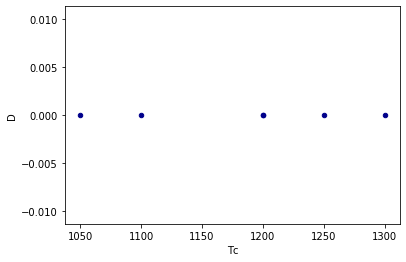

In [17]:
ax1 = Ddat.plot.scatter(x='Tc',
                      y='D',
                      c='DarkBlue') # this uses some in-built plot functions in Pandas

You can create new variables from the existing ones as follows - find out more with this useful cheatsheet about [data wrangling](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

In [26]:
Ddat = Ddat.assign(
    Tk = lambda dataframe: dataframe['Tc'].map(lambda Tc: Tc+273.15) 
)

Ddat

,Tc,D,Tk
0,1200,5.800000e-17,1473.15
1,1100,5.500000e-18,1373.15
2,1250,3.400000e-17,1523.15
3,1200,1.800000e-17,1473.15
4,1050,3.100000e-18,1323.15
5,1300,2.000000e-16,1573.15


The scikt-learn package can be used to fit model functions to data. Simple linear regression of diffusion rate as a function of temperature can be done as follows:

In [19]:
from sklearn.linear_model import LinearRegression

X = Ddat.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array - picks out 0th column (i.e. Tc)
Y = Ddat.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


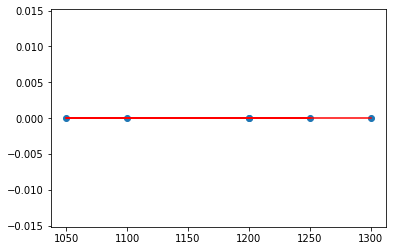

In [20]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

This does not seem very promising! Don't lose hope though - with a bit of work we can extract something useful

Take a look at the Arrhenius expression for diffusion. You wouldn't predict a linear relationship between $D$ and $T$. However, if you take the natural logarithm of both sides, you should be able to spot a way of finding a linear relationship between $\ln{D}$ and $1/T$. 

**Q5) Use this approach, along with the Pandas tricks from above, to estimate the activation energy for Mg-Fe diffusion in olivine.**

A5) Hint - make a comparison with the values suggested by Chakraborty to see if you are in the right ball-park.


First of all, we should be clear about the consequences of taking logs:

$D = D_0 \exp{\left(\frac{-E_a}{RT}\right)}$

converts to 

$\ln{D} = \ln{D_0} + \left(\frac{-E_a}{R}\right)\frac{1}{T}$

Which you can see is the expression of a straight line when $\ln{D}$ is expressed as a function of $1/T$ with a slope of $E_a/R$. Remember that $T$ needs to be in Kelvin. 


In [27]:
Ddat

,Tc,D,Tk
0,1200,5.800000e-17,1473.15
1,1100,5.500000e-18,1373.15
2,1250,3.400000e-17,1523.15
3,1200,1.800000e-17,1473.15
4,1050,3.100000e-18,1323.15
5,1300,2.000000e-16,1573.15


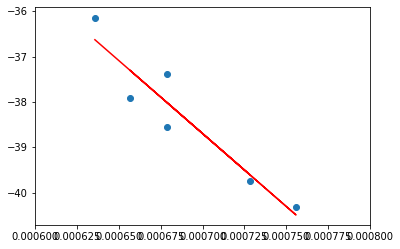

In [32]:
Ddat = Ddat.assign(
    invTk = lambda dataframe: dataframe['Tk'].map(lambda Tk: 1./Tk) 
) # Makes column with 1/T in it

Ddat = Ddat.assign(
    lnD = lambda dataframe: dataframe['D'].map(lambda D: np.log(D)) 
) # makes column with ln D


X = Ddat.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array - pick column with 1/t
Y = Ddat.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlim(0.0006,.0008)
plt.show()



Superb - so now we have a reasonable looking fit. Now we need to find a way of recovering the slope from the regression model and converting that to $Ea$.

In [36]:
linear_regressor.coef_ # if you look up the manual pages for linear regression in scikit-learn you can see that coef_ stores ths slope


array([[-32156.56306055]])

In [37]:
m = linear_regressor.coef_
R = 8.31 # J mol-1 K-1 Gas constant
Ea = -R*m
Ea # answer is about 267 kJ mol-1 which is similar to that in the paper

array([[267221.03903316]])

The typical uncertainty on olivine-melt equilibration temperatures is $\pm 20$ degrees C. 

**Q6) How might this uncertainty translate into uncertainty in diffusion timescales?**

A6) If we remember that the time is inversely proportional to the $D$, then we can say that $D_{hit}$ is the higher T diffusion ceofficient and $D_{lot}$ is the lower T coefficient. Therefore

$\frac{t_{lot}}{t_{hit}} = \frac{D_{hit}}{D_{lot}}$

With some substitution and simplification we can see that

$\frac{t_{lot}}{t_{hit}} = \frac{D_{hit}}{D_{lot}} = \exp{\left[ \frac{-E_a}{R} \left( \frac{1}{T_{hit}} - \frac{1}{T_{lot}} \right) \right]} $

Picking $T_{hit}$ of 1220C and $T_{lot}$ of 1180C then provides the following ratio 


In [39]:
tkh = 1220 +273.15 # converted to K
tkl = 1180 +273.15 # converted to K
tinvs = (1./tkh) - (1./tkl)
ear = -Ea/R

time_rat = np.exp(ear*tinvs)
time_rat

array([[1.80906527]])

This example generates almost a factor of two uncertainty in the recovered timescale - and this doesn't include any uncertainty from the fits to the experimental data. 

Uncertainty in temperature of the diffusion process is usually the largest source of error in the estimation of timescales. Only in selected, well-understood systems, is it worthwhile considering further sources of uncertainty to better constrain timescales.